<h2>Space-O-Analytics</h2>

<b>Name : Aniruddha Joshi</b><br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

In [2]:
dataset=pd.read_csv('dataset.csv')
print(dataset.shape)

(147636, 17)


In [3]:
dataset

,source_id,mh_gspphot,distance_gspphot,radius_gspphot,vsini_esphs,radius_flame,lum_flame,mass_flame,age_flame,gravredshift_flame,parallax,l,b,ecl_lon,ecl_lat,teff_gspphot,logg_gspphot
0,1892971994938385152,-0.2297,1913.2518,0.6903,NaN,0.685477,0.305313,NaN,NaN,0.715506,0.348986,82.165025,-21.853855,343.535985,36.554186,5186.1343,4.6501
1,1892971994938390912,-1.1103,1414.8071,0.4954,NaN,0.502544,0.109534,NaN,NaN,0.740547,0.480361,82.164878,-21.848257,343.533972,36.559548,4688.9214,4.7918
2,1892971999234781312,0.0661,1411.8239,0.7323,NaN,0.712528,0.286425,NaN,NaN,0.700343,0.427786,82.164935,-21.851485,343.535102,36.556449,4999.6910,4.6251
3,1892972098017629696,-0.9274,1215.6301,0.5737,NaN,0.800931,0.261453,0.740356,7.046982,0.620988,0.573415,82.178600,-21.832551,343.544076,36.578069,4617.4937,4.6663
4,1892972102313998080,-0.7981,1557.3232,0.6925,NaN,0.689407,0.405947,NaN,NaN,0.652070,0.316721,82.172188,-21.843375,343.540505,36.566054,5549.7350,4.6039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147631,1897959173524272896,0.0041,1814.6660,0.7479,NaN,0.710311,0.216213,0.754551,4.507220,0.621226,0.438966,85.164327,-18.246667,345.907215,40.740029,4668.7220,4.5665
147632,1897959173524280704,0.0436,1189.6232,0.6318,NaN,0.724450,0.175057,0.691068,3.601909,0.662967,0.683736,85.169663,-18.241542,345.912229,40.746154,4383.8500,4.6711
147633,1897959207884022912,-0.6622,2112.5496,0.8272,NaN,0.744241,0.236814,0.752489,4.347327,0.584876,0.479677,85.175923,-18.241423,345.919845,40.747594,4656.5356,4.4663
147634,1897959212180118400,-0.4128,1479.3003,1.4229,NaN,1.663588,2.337818,1.011900,10.542563,0.539568,0.545848,85.179146,-18.238087,345.922804,40.751528,5531.9434,4.2138


In [4]:
dataset=dataset.drop(['vsini_esphs','mass_flame', 'age_flame'], axis=1)

In [5]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
features_with_na

[]

In [6]:
dataset.isnull().sum()

source_id             0
mh_gspphot            0
distance_gspphot      0
radius_gspphot        0
radius_flame          0
lum_flame             0
gravredshift_flame    0
parallax              0
l                     0
b                     0
ecl_lon               0
ecl_lat               0
teff_gspphot          0
logg_gspphot          0
dtype: int64

In [7]:
dataset.shape

(147636, 14)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147636 entries, 0 to 147635
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   source_id           147636 non-null  int64  
 1   mh_gspphot          147636 non-null  float64
 2   distance_gspphot    147636 non-null  float64
 3   radius_gspphot      147636 non-null  float64
 4   radius_flame        147636 non-null  float64
 5   lum_flame           147636 non-null  float64
 6   gravredshift_flame  147636 non-null  float64
 7   parallax            147636 non-null  float64
 8   l                   147636 non-null  float64
 9   b                   147636 non-null  float64
 10  ecl_lon             147636 non-null  float64
 11  ecl_lat             147636 non-null  float64
 12  teff_gspphot        147636 non-null  float64
 13  logg_gspphot        147636 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 15.8 MB


In [9]:
dataset.describe()


,source_id,mh_gspphot,distance_gspphot,radius_gspphot,radius_flame,lum_flame,gravredshift_flame,parallax,l,b,ecl_lon,ecl_lat,teff_gspphot,logg_gspphot
count,1.476360e+05,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000
mean,1.895640e+18,-0.547239,1479.805052,1.071527,1.074612,2.365069,0.596880,0.780890,85.163179,-20.783191,346.583013,38.209715,5031.641598,4.468035
std,1.465586e+15,0.527875,853.941043,2.453623,1.839009,30.354777,0.131076,0.870726,2.285507,1.646300,2.958844,1.367978,686.522622,0.356595
min,1.892972e+18,-4.094300,26.960800,0.164700,0.072414,0.002765,0.002954,-0.017029,81.611368,-24.375435,341.385072,34.876157,2979.154000,0.167400
25%,1.894377e+18,-0.852700,1008.858200,0.612600,0.623485,0.183361,0.554355,0.348950,83.195804,-21.969235,343.989886,37.156361,4585.482250,4.390900
50%,1.895770e+18,-0.500350,1393.641200,0.735900,0.764071,0.319343,0.632125,0.559921,84.820109,-20.876400,346.103051,38.174735,5091.627350,4.565500
75%,1.896933e+18,-0.163000,1804.278400,0.958200,1.019875,0.773069,0.685930,0.897559,87.123169,-19.489253,349.240662,39.247365,5461.375250,4.671625
max,1.897959e+18,0.798800,20662.037000,383.998400,163.556800,3441.961200,1.583271,37.059133,89.766950,-17.331883,352.502046,41.254695,19983.633000,5.143500


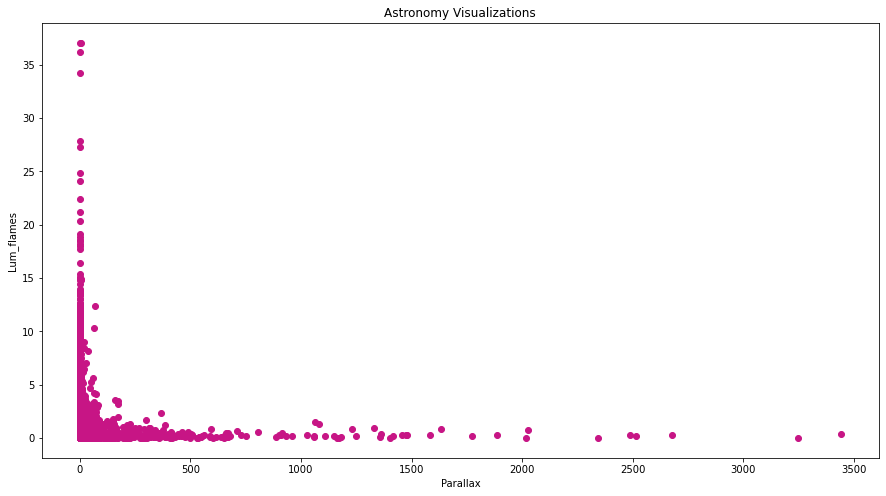

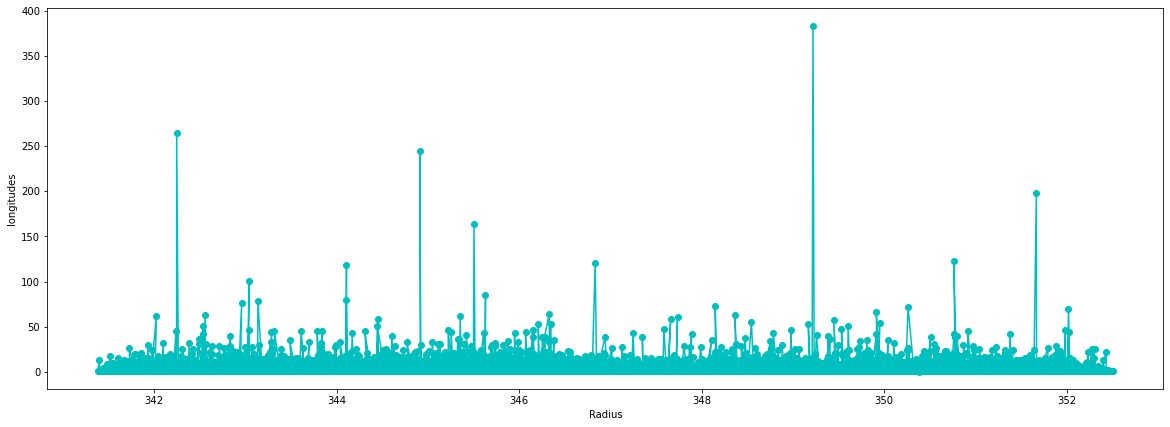

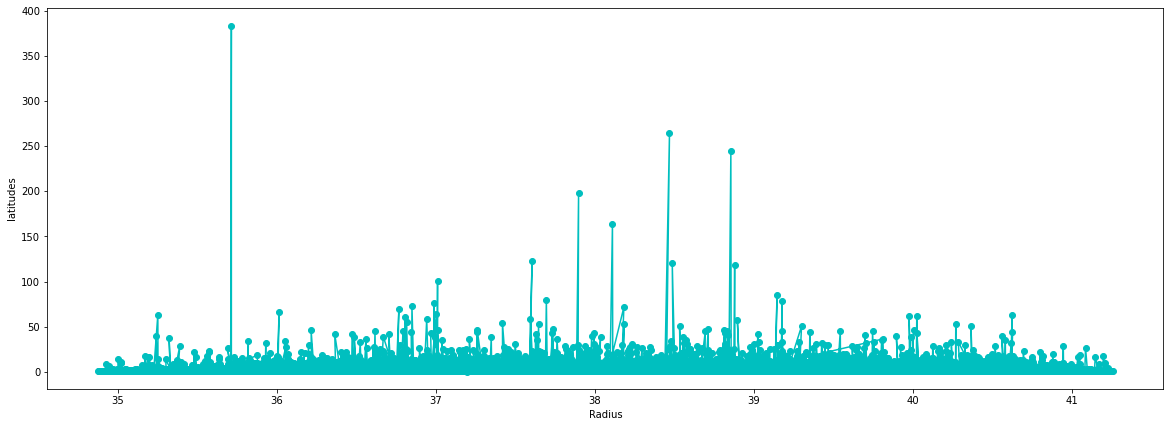

In [10]:
fig = plt.figure(figsize=(15,8))
plt.scatter(dataset.lum_flame, dataset.parallax,color='mediumvioletred')
plt.title("Astronomy Visualizations")
plt.ylabel('Lum_flames')
plt.xlabel('Parallax')


plt.figure(figsize=(20,7))
plt.plot(dataset.ecl_lon,dataset.radius_gspphot,marker='o', color='c')
# plt.bar(dataset.ecl_lon,dataset.radius_gspphot)
plt.ylabel('longitudes')
plt.xlabel('Radius')


plt.figure(figsize=(20,7))
plt.plot(dataset.ecl_lat,dataset.radius_gspphot,marker='o', color='c')
# plt.bar(dataset.ecl_lon,dataset.radius_gspphot)
plt.ylabel('latitudes')
plt.xlabel('Radius')
plt.show()




# plt.tight_layout()

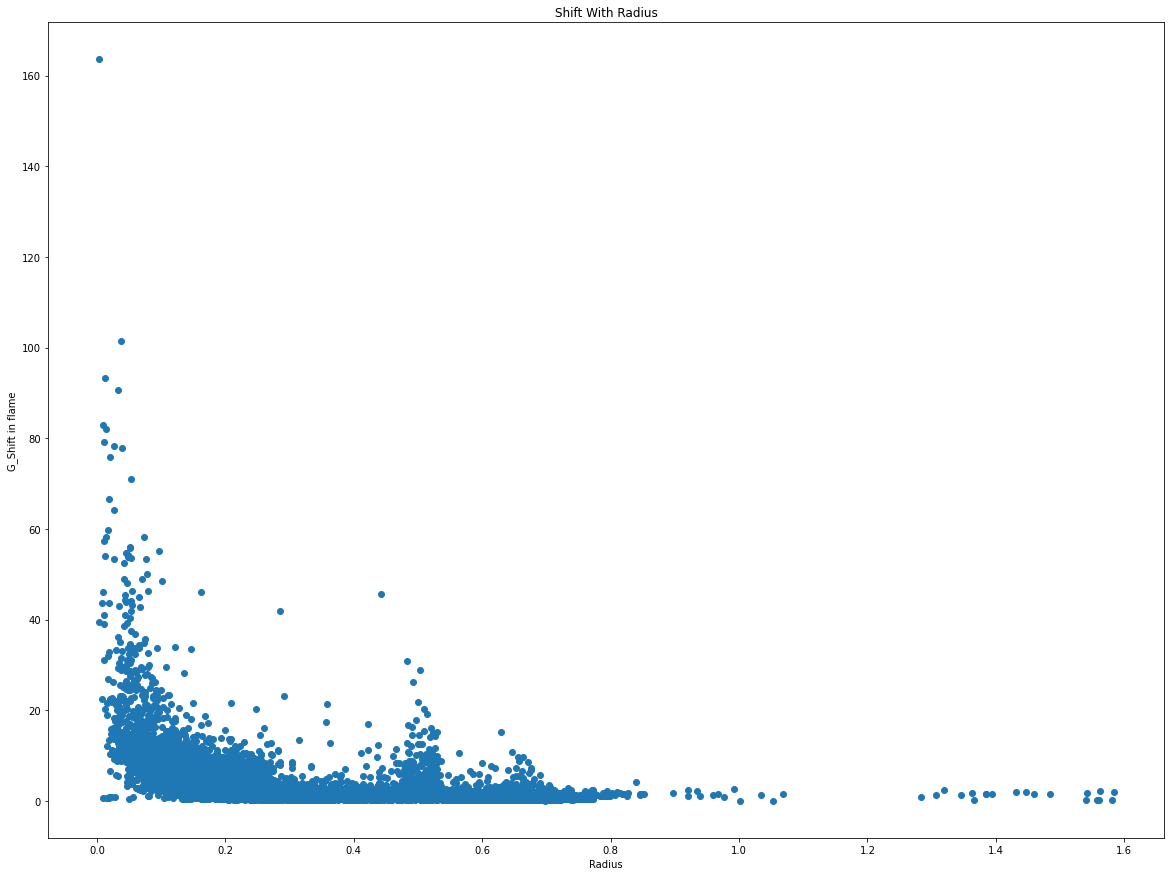

In [11]:

plt.figure(figsize=(20,15))
plt.scatter(dataset.gravredshift_flame,dataset.radius_flame)
plt.ylabel('G_Shift in flame')
plt.xlabel('Radius')
plt.title("Shift With Radius")
plt.show()

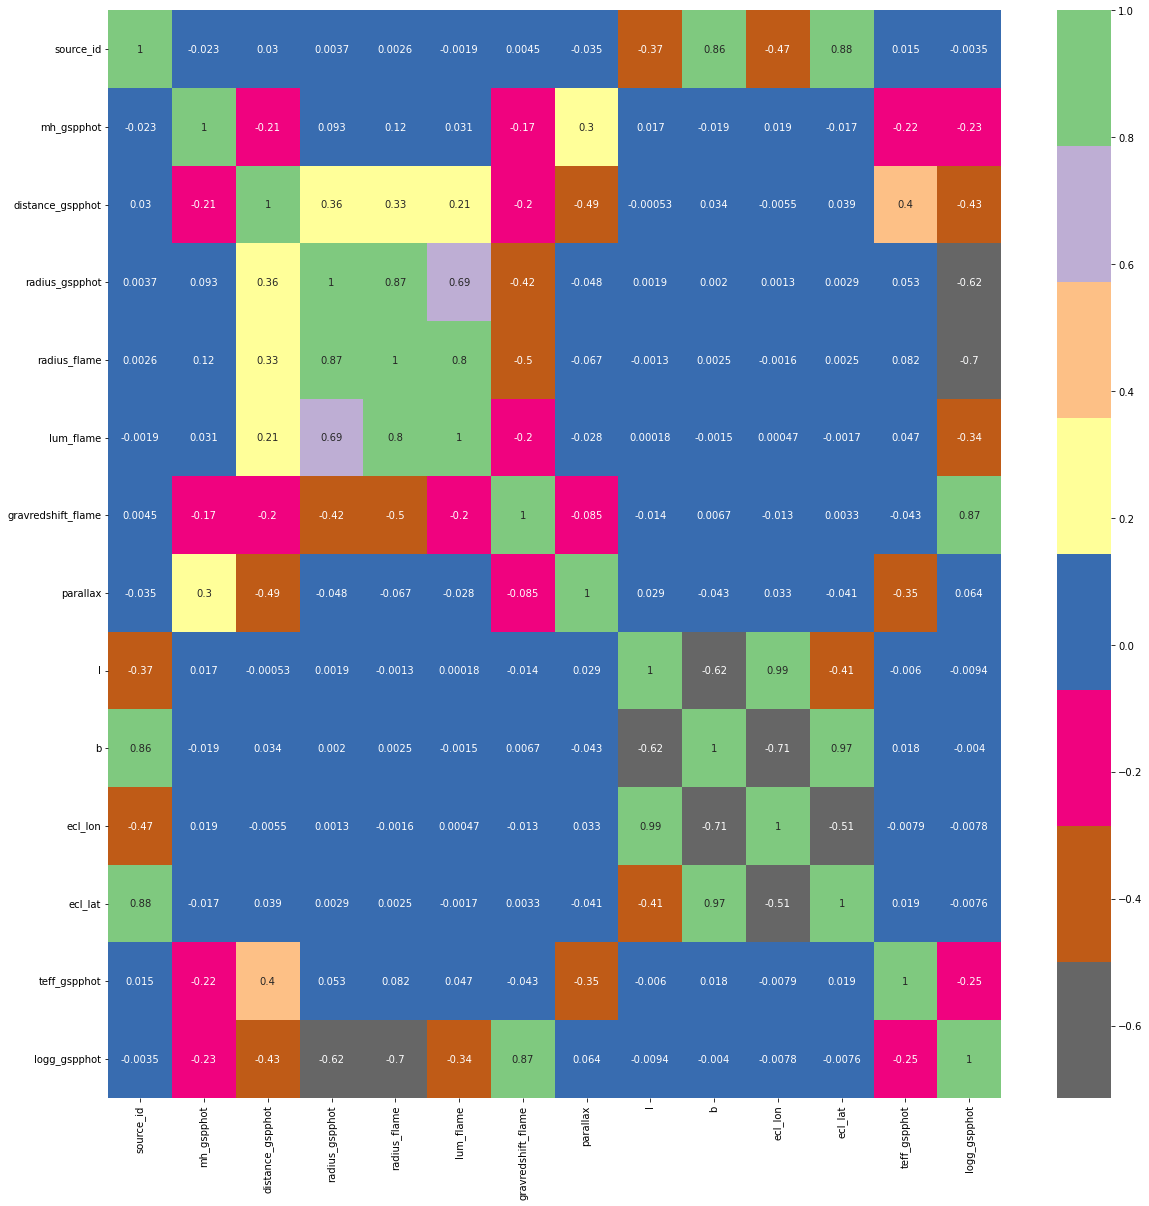

In [12]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

Text(0, 0.5, 'B')

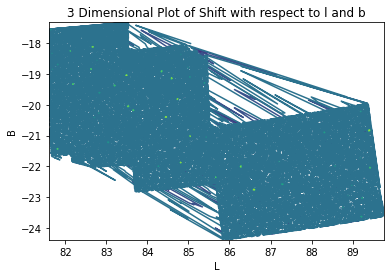

In [22]:
plt.title("3 Dimensional Plot of Shift with respect to l and b")
# plt.figure(figsize=(15,9))
# fig, ax = plt.subplots()
plt.tricontour(dataset.l,dataset.b,dataset.gravredshift_flame)
plt.xlabel("L")
plt.ylabel("B")
# plt.show()

**Conclusion**: EDA i.e. Exploratory Data Analysis is done on the dataset. Some features which had less correlation has been dropped from the analysis. Visualizations are done on a dataset. Correlation matrix is telling the correlations in between the features.Astronomy is really a vast field and the graphs are trying to tell the same.

**Thank You!**


*github:* https://github.com/amj011/Space-O-Analytics<br>
*linkedin:* https://www.linkedin.com/in/aniruddha-joshi-5113b8213